## Understanding the Dataset 

In [1]:
import pandas as pd 

In [2]:
trend = pd.read_csv("trends1.csv")
prediction = pd.read_csv("predictions.csv")

In [3]:
trend

,Unnamed: 0,top 1,top 2,top 3,date
0,0,4,14,14,2012-10-07
1,1,7,15,18,2012-10-14
2,2,5,12,15,2012-10-21
3,3,5,15,12,2012-10-28
4,4,4,12,12,2012-11-04
...,...,...,...,...,...
256,256,18,72,35,2017-09-03
257,257,17,67,37,2017-09-10
258,258,18,66,32,2017-09-17
259,259,19,62,31,2017-09-24


### Data Cleaning

1. Drop unwanted column

In [4]:
trend.drop(["Unnamed: 0"],axis=1,inplace=True)

In [5]:
trend

,top 1,top 2,top 3,date
0,4,14,14,2012-10-07
1,7,15,18,2012-10-14
2,5,12,15,2012-10-21
3,5,15,12,2012-10-28
4,4,12,12,2012-11-04
...,...,...,...,...
256,18,72,35,2017-09-03
257,17,67,37,2017-09-10
258,18,66,32,2017-09-17
259,19,62,31,2017-09-24


2. Check column data types

In [6]:
trend.dtypes

top 1     int64
top 2     int64
top 3     int64
date     object
dtype: object

In [7]:
import datetime as dt
#Convert string date to datetime format 
def toDate(strDate):
    return dt.datetime.strptime(strDate,"%Y-%m-%d")

def getYear(strDate):
    return dt.datetime.strptime(strDate,"%Y-%m-%d").year

def getMonth(strDate):
    return dt.datetime.strptime(strDate,"%Y-%m-%d").month

trend["year"] = trend["date"].apply(getYear)
trend["date"] = trend["date"].apply(toDate)

In [8]:
trend.dtypes

top 1             int64
top 2             int64
top 3             int64
date     datetime64[ns]
year              int64
dtype: object

### Data Analysis 

In [9]:
import matplotlib.pyplot as plt 
%matplotlib inline 

C:\Users\leong\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


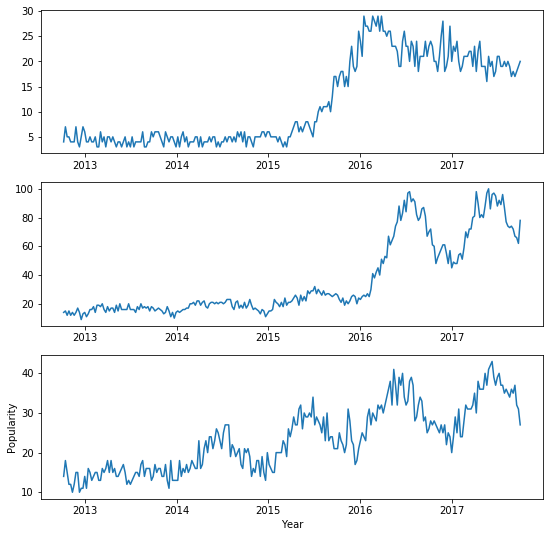

In [10]:
fig = plt.figure(figsize=(9,9))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.plot(trend["date"],trend["top 1"],label="top 1")
ax2.plot(trend["date"],trend["top 2"],label="top 2")
ax3.plot(trend["date"],trend["top 3"],label="top 3")

plt.xlabel("Year")
plt.ylabel("Popularity")
plt.show()

### Quantify performance of last year

In [11]:
last_year_trend = trend[trend["year"] == 2017]

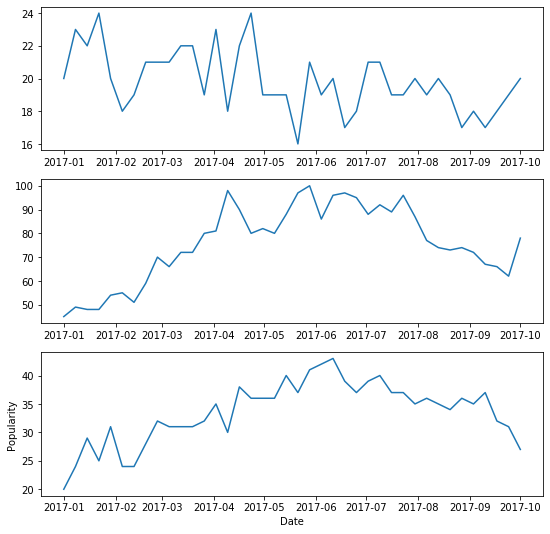

In [12]:
fig = plt.figure(figsize=(9,9))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.plot(last_year_trend["date"],last_year_trend["top 1"],label="top 1")
ax2.plot(last_year_trend["date"],last_year_trend["top 2"],label="top 2")
ax3.plot(last_year_trend["date"],last_year_trend["top 3"],label="top 3")

plt.xlabel("Date")
plt.ylabel("Popularity")
plt.show()

## Prediction.csv

In [13]:
prediction

,Unnamed: 0,date,fit top 1,fit top 2,fit top 3,fit2 top 3,fit3 top 3,fit2 top 2,fit3 top 2,fit2 top 1,fit3 top 1
0,0,2012-10-07,6.464020,14.918372,12.852700,17.560586,16.691433,21.967562,19.348604,6.676299,6.814028
1,1,2012-10-14,6.405044,14.879459,13.460605,17.584433,16.864402,20.428943,18.149665,6.553469,6.678460
2,2,2012-10-21,5.594880,12.766397,12.500809,16.287381,15.672930,17.533925,15.621429,5.685904,5.801919
3,3,2012-10-28,4.556118,9.883558,11.040882,14.667064,14.128378,14.478612,13.020325,4.598339,4.706192
4,4,2012-11-04,4.203193,8.345088,10.553082,14.029395,13.566908,12.894532,11.970428,4.200978,4.297650
...,...,...,...,...,...,...,...,...,...,...,...
621,621,2018-09-27,16.588328,98.782168,36.344867,36.316258,36.037766,73.258258,64.549945,17.507205,17.533665
622,622,2018-09-28,16.655365,98.884051,36.503322,36.415425,36.139121,73.103604,64.319097,17.567572,17.594394
623,623,2018-09-29,16.724295,99.019655,36.689969,36.538825,36.265359,72.967858,64.104769,17.629760,17.656862
624,624,2018-09-30,16.794364,99.184409,36.900044,36.682254,36.412168,72.847916,63.903832,17.693017,17.720324


In [14]:
prediction["year"] = prediction["date"].apply(getYear)
prediction["date"] = prediction["date"].apply(toDate)

In [15]:
prediction.drop("Unnamed: 0",axis=1,inplace = True)

In [16]:
# Only before 01/10/20
without_prediction = prediction.iloc[:261,:]


In [17]:
# Three fit for each trend 

fit_top1 = without_prediction[["fit top 1","fit2 top 1","fit3 top 1"]]
fit_top2 = without_prediction[["fit top 2","fit2 top 2","fit3 top 2"]]
fit_top3 = without_prediction[["fit top 3","fit2 top 3","fit3 top 3"]]

#### Find the best fit for all tops


In [18]:
from sklearn.metrics import mean_squared_error

def analysing_fit(actual,prediction_all,top_number):
    mse_list = []
    for (_, col) in prediction_all.iteritems():
        mse = mean_squared_error(actual,col)
        mse_list.append(mse)
    for i in range(1,4):
        print("Mse of fit = " + str(i) + " for top number = " + str(top_number) + " is " + str(mse_list[i-1]))

In [19]:
analysing_fit(trend["top 1"],fit_top1,1)

Mse of fit = 1 for top number = 1 is 4.619445525420836
Mse of fit = 2 for top number = 1 is 3.1640622488272965
Mse of fit = 3 for top number = 1 is 3.090522223996622


In [20]:
analysing_fit(trend["top 2"],fit_top2,2)

Mse of fit = 1 for top number = 2 is 69.4652906322346
Mse of fit = 2 for top number = 2 is 19.387723969566412
Mse of fit = 3 for top number = 2 is 13.031480017222918


In [21]:
analysing_fit(trend["top 3"],fit_top3,3)

Mse of fit = 1 for top number = 3 is 8.876389828466367
Mse of fit = 2 for top number = 3 is 6.070224709526724
Mse of fit = 3 for top number = 3 is 5.608813118784618


#### Provides assessment of how the demand is going to change over the next 3, 6 and 12 months 

In [22]:
fit3_col = ["date","fit3 top 1","fit3 top 2","fit3 top 3"]
prediction_only = prediction.iloc[260:,:][fit3_col]


In [23]:
date = dt.datetime.strptime("01-01-2018","%d-%m-%Y")
date_six_month = dt.datetime.strptime("01-4-2018","%d-%m-%Y")
three_month_prediction = prediction_only[prediction_only["date"] < date]
six_month_prediction = prediction_only[prediction_only["date"] < date_six_month]

In [24]:
def displayPrediction(prediction_df):
    plt.plot(prediction_df["date"],prediction_df["fit3 top 1"],label="top 1",c="red")
    plt.plot(prediction_df["date"],prediction_df["fit3 top 2"],label="top 2",c="blue")
    plt.plot(prediction_df["date"],prediction_df["fit3 top 3"],label="top 3",c="green")
    plt.xticks(rotation=90)
    plt.legend()
    plt.xlabel("Date")
    plt.ylabel("Popularity Score")
    plt.show()

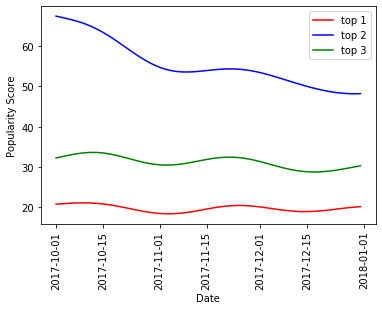

In [25]:
displayPrediction(three_month_prediction)

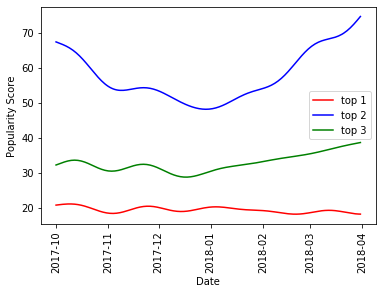

In [26]:
displayPrediction(six_month_prediction)

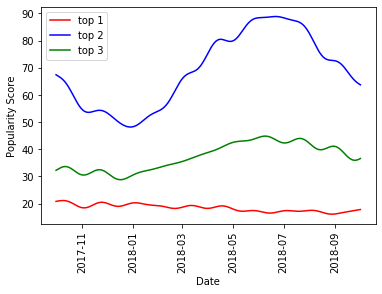

In [27]:
displayPrediction(prediction_only)

#### Create a predictive model using trend dataset 

Objective: To predict popularity score for "top 1,2 and 3" using the trend dataset.

#### Adding extra features that are required to build the model

In [28]:
def computeAverage(df,no_of_days,col):
    df.is_copy = None 
    avg_col = df[col]
    avg_col = avg_col.rolling(no_of_days).mean()
    avg_col = avg_col.shift(1)
    return avg_col

def computeSd(df,no_of_days,col):
    avg_sd = df[col]
    avg_sd = avg_sd.rolling(no_of_days).std()
    avg_sd = avg_sd.shift(1)
    return avg_sd


In [29]:
top_one = trend[["top 1"]]
top_two = trend[["top 2"]]
top_three = trend[["top 3"]]

In [30]:
top_one["avg_5"] = computeAverage(top_one,5,"top 1")
top_two["avg_5"] = computeAverage(top_two,5,"top 2")
top_three["avg_5"] = computeAverage(top_three,5,"top 3")

C:\Users\leong\Anaconda3\lib\site-packages\pandas\core\generic.py:5191: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\leong\Anaconda3\lib\site-packages\pandas\core\generic.py:5192: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


In [31]:
top_one["std_5"] = computeSd(top_one,5,"top 1")
top_two["std_5"] = computeSd(top_two,5,"top 2")
top_three["std_5"] = computeSd(top_three,5,"top 3")

#### Rows that do not have enough historical data are dropped 

In [32]:
top_one = top_one.dropna(axis=0)
top_two = top_two.dropna(axis=0)
top_three = top_three.dropna(axis=0)

#### Building a Predictive Model (1) - Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

def predict_linear(df,target):
    lr = LinearRegression()
    lr.fit(df[["avg_5","std_5"]],df[target])
    pred = lr.predict(df[["avg_5","std_5"]])
    mse = mean_squared_error(df[target],pred)
    print("Mse for " + target + " using Linear Regression is " + str(mse))
    

In [34]:
predict_linear(top_one,"top 1")

Mse for top 1 using Linear Regression is 3.413921198829467


In [35]:
predict_linear(top_two,"top 2")

Mse for top 2 using Linear Regression is 30.426093313645413


In [36]:
predict_linear(top_three,"top 3")

Mse for top 3 using Linear Regression is 8.31317648609674


#### Building a predictive model (2) - Random Forest


In [37]:
# Use top 1, top 2 and top 3 dataset 

from sklearn.ensemble import RandomForestRegressor

def predict_forest(df,target):
    clf = RandomForestRegressor(n_estimators = 20,random_state=1,min_samples_leaf = 2)
    clf.fit(df[["avg_5","std_5"]],df[target])
    pred = clf.predict(df[["avg_5","std_5"]])
    df["pred"] = pred
    mse = mean_squared_error(df[target],pred)
    print("Mse for " + target + " using Random Forest is " + str(mse))
    return df


In [38]:
top_one = predict_forest(top_one,"top 1")

Mse for top 1 using Random Forest is 1.5261699469886938


In [39]:
top_two = predict_forest(top_two,"top 2")

Mse for top 2 using Random Forest is 12.60796765086367


In [40]:
top_three = predict_forest(top_three,"top 3")

Mse for top 3 using Random Forest is 3.6239799000654873


In [41]:
modified_trend = pd.concat([top_one,top_two,top_three],axis=1)

### A closer look to see how well our predictive model has performed

In [42]:
modified_trend.drop(["avg_5","std_5"],axis=1,inplace=True)

In [43]:
modified_trend.head(50)

,top 1,pred,top 2,pred,top 3,pred
5,4,4.298750,14,14.369583,10,12.468333
6,4,4.298750,12,14.369583,12,12.455893
7,7,4.393310,14,15.046667,15,14.835119
8,4,4.985317,17,15.411667,15,14.835119
9,3,4.104683,14,15.325833,10,12.486905
10,5,5.388036,9,13.044167,11,11.678690
11,7,5.333571,13,13.109008,11,12.960655
12,6,5.556548,14,12.953175,14,12.645476
13,4,4.996548,11,12.953175,11,12.303571
14,4,4.996548,13,13.666786,16,15.305119
